In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Workshop-06-dataset.zip', sep='\t',dtype=np.str)

In [3]:
df.head()

transaction_ID        Date   Time                              item_0  \
0         536365  01/12/2010  08:26  WHITE HANGING HEART T-LIGHT HOLDER   
1         536366  01/12/2010  08:28              HAND WARMER UNION JACK   
2         536367  01/12/2010  08:34       ASSORTED COLOUR BIRD ORNAMENT   
3         536368  01/12/2010  08:34            JAM MAKING SET WITH JARS   
4         536369  01/12/2010  08:35            BATH BUILDING BLOCK WORD   

                        item_1                          item_2  \
0          WHITE METAL LANTERN  CREAM CUPID HEARTS COAT HANGER   
1    HAND WARMER RED POLKA DOT                             NaN   
2    POPPY'S PLAYHOUSE BEDROOM       POPPY'S PLAYHOUSE KITCHEN   
3  RED COAT RACK PARIS FASHION  YELLOW COAT RACK PARIS FASHION   
4                          NaN                             NaN   

                                item_3                         item_4  \
0  KNITTED UNION FLAG HOT WATER BOTTLE  RED WOOLLY HOTTIE WHITE HEART   
1                                  NaN                            NaN   
2    FELTCRAFT PRINCESS CHARLOTTE DOLL         IVORY KNITTED MUG COSY   
3         BLUE COAT RACK PARIS FASHION                            NaN   
4                                  NaN                            NaN   

                               item_5                             item_6  ...  \
0        SET 7 BABUSHKA NESTING BOXES  GLASS STAR FROSTED T-LIGHT HOLDER  ...   
1                                 NaN                                NaN  ...   
2  BOX OF 6 ASSORTED COLOUR TEASPOONS       BOX OF VINTAGE JIGSAW BLOCKS  ...   
3                                 NaN                                NaN  ...   
4                                 NaN                                NaN  ...   

  item_31 item_32 item_33 item_34 item_35 item_36 item_37 item_38 item_39  \
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

  item_40  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN  

[5 rows x 44 columns]

In [4]:
STUDENT_NAME = 'EstenEnock'
STUDENT_NO = '0131'

In [5]:
np.random.seed(int(STUDENT_NO))
unique_id = int('2' + STUDENT_NO)
rows = np.random.choice(df.index.values, unique_id)
data = df.loc[rows]

In [6]:
file_name = STUDENT_NAME + "_" + STUDENT_NO + ".csv"
data.to_csv(file_name)

In [7]:
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M').dt.hour

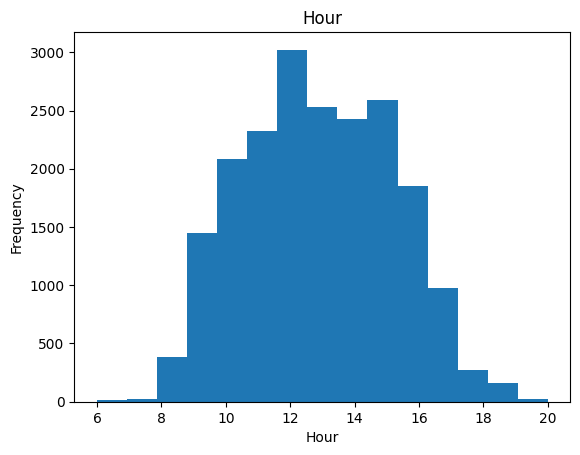

In [8]:
hour_hist = data.hist(column="Hour", bins=15, grid=False)
for ax in hour_hist.flatten():
 ax.set_xlabel("Hour")
 ax.set_ylabel("Frequency")


In [9]:
from apyori import apriori
from collections import Counter

In [10]:
items_df=data[data.columns[3:44]]

In [11]:
baskets = items_df.T.apply(lambda x: x.dropna().tolist()).tolist()

In [12]:
settings = [
    {"min_support": 0.015, "min_confidence": 0.7, "min_lift": 3},
    {"min_support": 0.009, "min_confidence": 0.5, "min_lift": 3},
    {"min_support": 0.015, "min_confidence": 0.5, "min_lift": 9}
]

In [13]:
def display_rules_with_top_items(association_results, top_items):
    for item in association_results:
        pair = item[0]
        items = [x for x in pair]
        print("Rule: " + items[0] + " -> " + items[1])
        print("Support: " + str(item[1]))
        print("Confidence: " + str(item[2][0][2]))
        print("Lift: " + str(item[2][0][3]))
        print("=====================================")
        
        if items[0] in top_items or items[1] in top_items:
            print("Items present in the top 10 frequent items.")
        else:
            print("Items NOT present in the top 10 frequent items.")

In [14]:
frequent_items_counter = Counter()
for basket in baskets:
    if basket != 'nan':
        frequent_items_counter.update(basket)
del frequent_items_counter['nan']
top_10_items = [item[0] for item in frequent_items_counter.most_common(10)]

In [15]:
for idx, setting in enumerate(settings, start=1):
    print(f"\nSetting {idx}:")
    association_rules = apriori(baskets, **setting)
    association_results = list(association_rules)
    print(f'Number of rules generated: {len(association_results)}')
    display_rules_with_top_items(association_results[:10], top_10_items)


Setting 1:
Number of rules generated: 5
Rule: GARDENERS KNEELING PAD KEEP CALM -> GARDENERS KNEELING PAD CUP OF TEA
Support: 0.016243604391237395
Confidence: 0.7047413793103448
Lift: 24.168907507489862
Items NOT present in the top 10 frequent items.
Rule: PINK REGENCY TEACUP AND SAUCER -> GREEN REGENCY TEACUP AND SAUCER
Support: 0.018429288162535393
Confidence: 0.7794117647058824
Lift: 24.439779182701116
Items NOT present in the top 10 frequent items.
Rule: GREEN REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER
Support: 0.02240325865580448
Confidence: 0.7024922118380061
Lift: 20.61497188995758
Items NOT present in the top 10 frequent items.
Rule: PINK REGENCY TEACUP AND SAUCER -> ROSES REGENCY TEACUP AND SAUCER
Support: 0.017088073121057076
Confidence: 0.7226890756302521
Lift: 21.207658573633534
Items NOT present in the top 10 frequent items.
Rule: PINK REGENCY TEACUP AND SAUCER -> GREEN REGENCY TEACUP AND SAUCER
Support: 0.01534946103025185
Confidence: 0.8328840970350404


In [17]:
df['Date'] = pd.to_datetime(df['Date'])

In [18]:
filtered_data = df[df['Date'].dt.day_name() == 'Monday']

In [19]:
items_df = filtered_data[data.columns[3:44]]
baskets = items_df.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

In [20]:
association_rules = apriori(baskets, min_support=0.01, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [21]:
print(f'Number of rules generated for Mondays: {len(association_results)}')
for rule in association_results[:10]:
    print(rule)

Number of rules generated for Mondays: 90
RelationRecord(items=frozenset({'60 TEATIME FAIRY CAKE CASES', 'PACK OF 60 PINK PAISLEY CAKE CASES'}), support=0.010300949303171077, ordered_statistics=[OrderedStatistic(items_base=frozenset({'60 TEATIME FAIRY CAKE CASES'}), items_add=frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'}), confidence=0.3227848101265823, lift=11.254278837582456), OrderedStatistic(items_base=frozenset({'PACK OF 60 PINK PAISLEY CAKE CASES'}), items_add=frozenset({'60 TEATIME FAIRY CAKE CASES'}), confidence=0.3591549295774648, lift=11.254278837582458)])
RelationRecord(items=frozenset({'PACK OF 72 RETROSPOT CAKE CASES', '60 TEATIME FAIRY CAKE CASES'}), support=0.011512825691779438, ordered_statistics=[OrderedStatistic(items_base=frozenset({'60 TEATIME FAIRY CAKE CASES'}), items_add=frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}), confidence=0.36075949367088606, lift=7.732122308071674), OrderedStatistic(items_base=frozenset({'PACK OF 72 RETROSPOT CAKE CASES'}), items_add=f